# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_PROJETO_MOD14.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [6]:
# Verificação dos tipos de dados por coluna
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

In [7]:
# Vendo que temos algumas colunas com dados que deveriam ser booleanos para facilitar a análise
# Convertendo após as decisões da etapa 2(A)
df['Idoso'] = df['Idoso'].astype(bool)
df['Casado'] = df['Casado'].astype(bool)
df['Dependents'] = df['Dependents'].astype(bool)
df['Servico_Seguranca'] = df['Servico_Seguranca'].astype(bool)
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].astype(bool)
df['StreamingTV'] = df['StreamingTV'].astype(bool)


# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [8]:
# Verifica a porcentagem de dados faltantes por coluna
pct_nulos = (df.isnull().sum()/ len(df)) * 100
print(pct_nulos)

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64


B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [9]:
# Excluindo primeiramente os dados nulos da coluna Gênero, por apresentarem uma porcentagem muito pequena
# de dados nulos e sua exclusão não afetar muito a análise. Além de serem categóricos.
df.dropna(subset=['Genero'], inplace=True)

# Investigação dos dados de churn: Verifico a quantia de distribuição entre No e Yes
df['Churn'].value_counts(normalize=True) * 100

# Verifico se acho um padrão nas primeiras linhas entre os nulos de churn
df[df['Churn'].isnull()]

# Ao deletar as linhas nulas de gênero, acabei deletando as de churn. Resolvendo este problema no dataframe
# Por ser um dado categórico booleano vou convertê-lo para facilitar a análise
df['Churn'] = df['Churn'].astype(bool)

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

In [11]:
# Verificação da coluna com menor quantidade de dados nulos primeiro (Pagamento mensal 13%)
df[df['Pagamento_Mensal'].isnull()]
df['Pagamento_Mensal'].mean()

np.float64(65.60756321839081)

In [12]:
# Verificação da mediana
df['Pagamento_Mensal'].median()

np.float64(71.45)

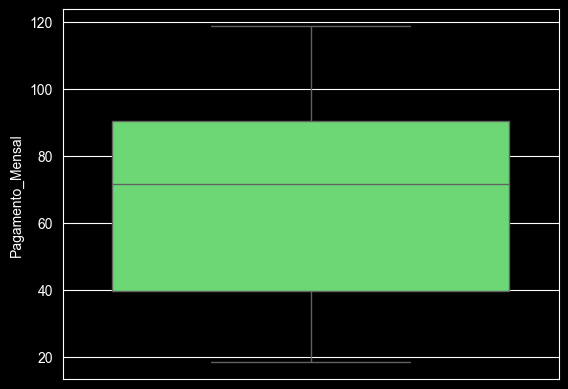

In [16]:
# Fazer um boxplot para verificar a presença de outliers
sns.boxplot(data = df, y = 'Pagamento_Mensal', color = '#5de866')
plt.show()

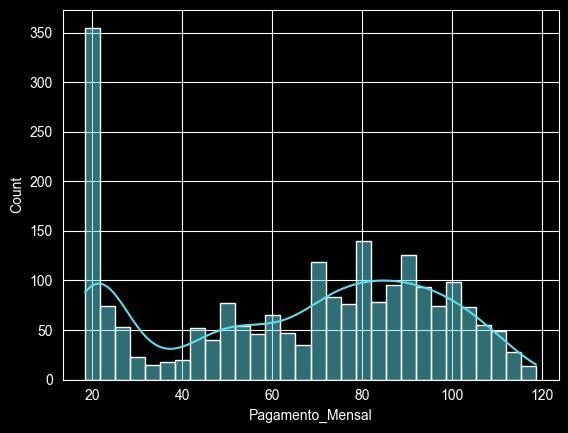

In [17]:
# Fazer um histograma para verificar qual a melhor medida para os dados nulos
sns.histplot(data = df, x = 'Pagamento_Mensal', bins = 30, color = '#5ddce8', kde = True)
plt.show()

In [21]:
# Como existe um número maior perto da mediana eu optei por manter a mediana
df['Pagamento_Mensal'].fillna(71.45, inplace = True)
df['Pagamento_Mensal'].isnull().sum()

np.int64(0)

In [22]:
# Contagem de valores para PhoneService
df['PhoneService'].value_counts()

PhoneService
Yes    920
No      86
Name: count, dtype: int64

In [23]:
# Contagem de nulos para PhoneService
df['PhoneService'].isnull().sum()

np.int64(1482)

In [28]:
# Tendo em vista a disparidade entre o yes e no, prefiro manter a proporção
# Cálculo de distribuições
df['PhoneService'].value_counts(normalize=True)
null_phone = 1482
# Essas variáveis abaixo recebem o valor percentual mostrado na função value_counts acima
yes_phone = 0.914513
no_phone = 0.085487
# Criação de variáveis para preenchimento de yes e no
fill_yes = int(round(null_phone * yes_phone))
fill_no = null_phone - fill_yes

# indexando os valores de acordo com suas proporções
null_idx = df[df['PhoneService'].isna()].index
yes_idx = null_idx[:fill_yes]
no_idx = null_idx[fill_no:]

df.loc[yes_idx, 'PhoneService'] = 'Yes'
df.loc[no_idx, 'PhoneService'] = 'No'

df['PhoneService'].isnull().sum()
df['PhoneService'] = df['PhoneService'].astype(bool)

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [41]:
# Colunas para verificar a escrita de valores: Genero, Servico_Internet, Tipo_Contrato, PaymentMethod
df['Genero'].unique()
df['Genero'] = df['Genero'].replace({'F':'Female', 'M': 'Male', 'f': 'Female'})
df['Genero'].unique()

df['Servico_Internet'] = df['Servico_Internet'].astype(str)
df['Servico_Internet'] = df['Servico_Internet'].str.upper()
df['Servico_Internet'].unique()

df['Tipo_Contrato'].unique()

df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [45]:
df.dtypes
df.rename(columns={'customerID': 'ID_Cliente',
                   'Dependents': 'Dependentes',
                   'PhoneService': 'Servico_Telefone',
                   'PaymentMethod': 'Metodo_Pagamento',
                   }, inplace=True)
df.dtypes

ID_Cliente             object
Genero                 object
Idoso                    bool
Casado                   bool
Dependentes              bool
Tempo_como_Cliente      int64
Servico_Telefone         bool
Servico_Internet       object
Servico_Seguranca        bool
Suporte_Tecnico          bool
StreamingTV              bool
Tipo_Contrato          object
Metodo_Pagamento       object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                    bool
dtype: object